In [2]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [3]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [4]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_gc=f.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

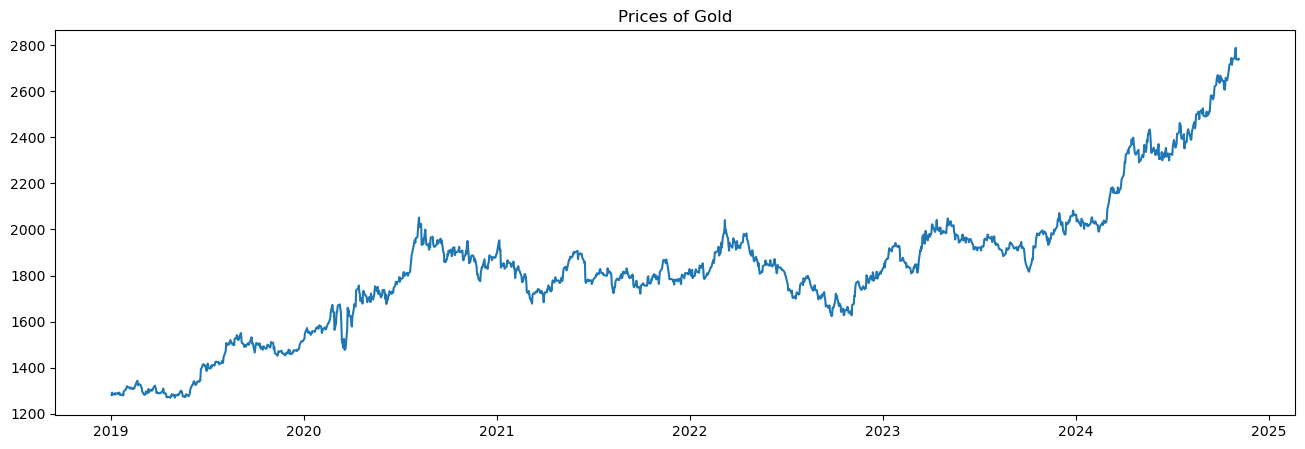

In [5]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [6]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]
     

In [7]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [8]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [9]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.10870, saving model to save_model_7_2_1.keras
19/19 - 4s - 215ms/step - loss: 0.1087
Epoch 2/80

Epoch 2: loss improved from 0.10870 to 0.03797, saving model to save_model_7_2_1.keras
19/19 - 1s - 53ms/step - loss: 0.0380
Epoch 3/80

Epoch 3: loss improved from 0.03797 to 0.02548, saving model to save_model_7_2_1.keras
19/19 - 1s - 54ms/step - loss: 0.0255
Epoch 4/80

Epoch 4: loss improved from 0.02548 to 0.02442, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0244
Epoch 5/80

Epoch 5: loss improved from 0.02442 to 0.02347, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0235
Epoch 6/80

Epoch 6: loss did not improve from 0.02347
19/19 - 1s - 50ms/step - loss: 0.0250
Epoch 7/80

Epoch 7: loss did not improve from 0.02347
19/19 - 1s - 50ms/step - loss: 0.0243
Epoch 8/80

Epoch 8: loss improved from 0.02347 to 0.02149, saving model to save_model_7_2_1.keras
19/19 - 1s - 54ms/step - loss: 0.0215
Epoch 

In [10]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [11]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [12]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [13]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6991178826071462, 0.6866112997919653, 0.6984596414063471, 0.7138625822664999, 0.6892442645951613, 0.6981964094336652, 0.6893760418505963, 0.6779225481952376, 0.6945760828292709, 0.6966824224180088, 0.6966166950593853, 0.6935887210280722, 0.7178120294712937, 0.7367035196804059, 0.7147840554399809, 0.7180095340853523, 0.7259741558535635, 0.7541469115015789, 0.7534886703007799, 0.7593469524802534, 0.7853474799118132, 0.7803449435471974, 0.7783702199448004, 0.7413112080859987, 0.7390073638832022, 0.7473012675209072, 0.7530279337140395, 0.7126118272235253, 0.7311084694736145, 0.729331250485276, 0.747564499493589, 0.7617166853107673, 0.7673117355175587, 0.7611900600963093, 0.7453922712771337, 0.7370985289085228, 0.7380200020820038, 0.7588862158935128, 0.7654029005428793, 0.7853474799118132, 0.7881779493290677, 0.7702079322934365, 0.7792259657596579, 0.8091759403960117, 0.8112822799847497, 0.81753557139234, 0.8156265751485665, 0.7962084597249965, 0.8156265751485665, 0.821748250569

In [14]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9070712327957153], [0.793885350227356], [0.6992588043212891], [0.648909866809845], [0.6193380355834961], [0.585443913936615], [0.5407885909080505], [0.4908420145511627], [0.4423637390136719], [0.39900848269462585], [0.3618408441543579], [0.33079850673675537], [0.30541136860847473], [0.2849743962287903], [0.2686293423175812], [0.25548288226127625], [0.2447168380022049], [0.23565058410167694], [0.2277558594942093], [0.2206437587738037], [0.21404045820236206], [0.20776087045669556], [0.20168602466583252], [0.1957448124885559], [0.1899002492427826], [0.18413904309272766], [0.17846441268920898], [0.17289023101329803], [0.16743704676628113], [0.1621285229921341]]


In [15]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [16]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2647.32262142]
 [2475.37063417]
 [2331.61399026]
 [2255.12388686]
 [2210.19836231]
 [2158.70641437]
 [2090.86604981]
 [2014.98721345]
 [1941.33901963]
 [1875.47371636]
 [1819.00864171]
 [1771.84912423]
 [1733.28098522]
 [1702.23313779]
 [1677.40173269]
 [1657.42963121]
 [1641.0738573 ]
 [1627.30040482]
 [1615.30673958]
 [1604.50203652]
 [1594.47030261]
 [1584.93035322]
 [1575.70144779]
 [1566.67555854]
 [1557.79649834]
 [1549.04407424]
 [1540.42317601]
 [1531.95487948]
 [1523.67040224]
 [1515.60569319]]


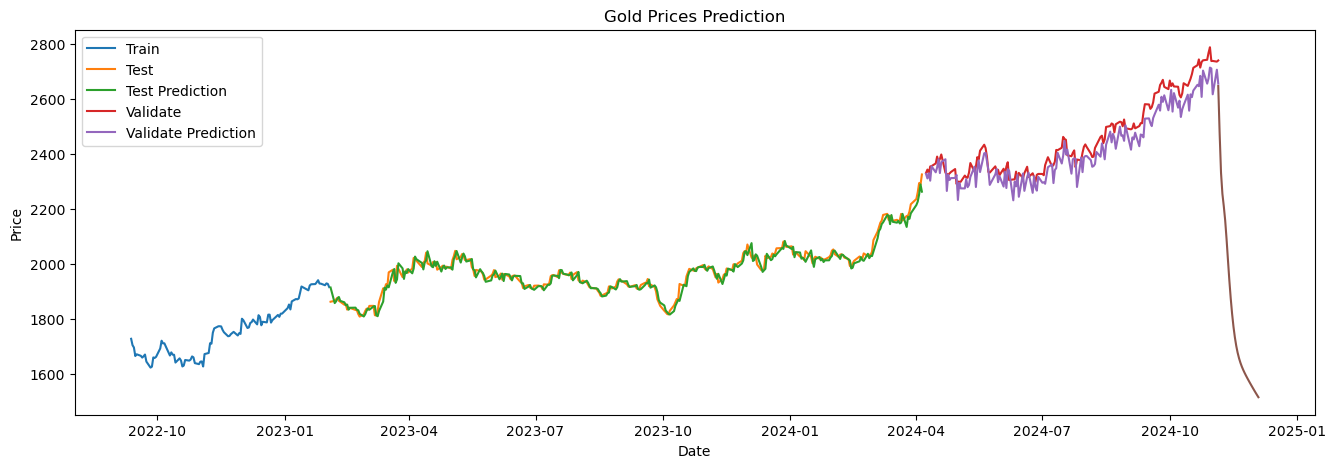

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [18]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.307163761320156
MAPE:  0.6675844463014686
RMSE:  17.951247428268026

** Validate **
MAE:  45.28895526446369
MAPE:  1.8150220156687393
RMSE:  53.285049933341234


# Split dataset (6-3-1)

---



In [19]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [20]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [21]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [22]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.10610, saving model to save_model_6_3_1.keras
16/16 - 4s - 254ms/step - loss: 0.1061
Epoch 2/80

Epoch 2: loss improved from 0.10610 to 0.03447, saving model to save_model_6_3_1.keras
16/16 - 1s - 63ms/step - loss: 0.0345
Epoch 3/80

Epoch 3: loss improved from 0.03447 to 0.02283, saving model to save_model_6_3_1.keras
16/16 - 1s - 60ms/step - loss: 0.0228
Epoch 4/80

Epoch 4: loss improved from 0.02283 to 0.02260, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0226
Epoch 5/80

Epoch 5: loss did not improve from 0.02260
16/16 - 1s - 51ms/step - loss: 0.0231
Epoch 6/80

Epoch 6: loss did not improve from 0.02260
16/16 - 1s - 51ms/step - loss: 0.0238
Epoch 7/80

Epoch 7: loss did not improve from 0.02260
16/16 - 1s - 54ms/step - loss: 0.0234
Epoch 8/80

Epoch 8: loss improved from 0.02260 to 0.02128, saving model to save_model_6_3_1.keras
16/16 - 1s - 52ms/step - loss: 0.0213
Epoch 9/80

Epoch 9: loss improved from 0.02128 to

In [23]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [24]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [25]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [26]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6991178826071462, 0.6866112997919653, 0.6984596414063471, 0.7138625822664999, 0.6892442645951613, 0.6981964094336652, 0.6893760418505963, 0.6779225481952376, 0.6945760828292709, 0.6966824224180088, 0.6966166950593853, 0.6935887210280722, 0.7178120294712937, 0.7367035196804059, 0.7147840554399809, 0.7180095340853523, 0.7259741558535635, 0.7541469115015789, 0.7534886703007799, 0.7593469524802534, 0.7853474799118132, 0.7803449435471974, 0.7783702199448004, 0.7413112080859987, 0.7390073638832022, 0.7473012675209072, 0.7530279337140395, 0.7126118272235253, 0.7311084694736145, 0.729331250485276, 0.747564499493589, 0.7617166853107673, 0.7673117355175587, 0.7611900600963093, 0.7453922712771337, 0.7370985289085228, 0.7380200020820038, 0.7588862158935128, 0.7654029005428793, 0.7853474799118132, 0.7881779493290677, 0.7702079322934365, 0.7792259657596579, 0.8091759403960117, 0.8112822799847497, 0.81753557139234, 0.8156265751485665, 0.7962084597249965, 0.8156265751485665, 0.821748250569

In [27]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9429866075515747], [0.8974573016166687], [0.859659731388092], [0.8367868661880493], [0.8194757699966431], [0.7980755567550659], [0.7705915570259094], [0.7406259775161743], [0.7122036218643188], [0.6869250535964966], [0.6642636656761169], [0.6430995464324951], [0.6227737665176392], [0.6032508611679077], [0.5847952961921692], [0.5676355957984924], [0.5518242120742798], [0.5372678637504578], [0.52381831407547], [0.5113427042961121], [0.49974948167800903], [0.48898154497146606], [0.47899723052978516], [0.4697556495666504], [0.4612095355987549], [0.4533059000968933], [0.4459892213344574], [0.4392050504684448], [0.43290281295776367], [0.4270364046096802]]


In [28]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2701.88525699]
 [2632.71713764]
 [2575.2950708 ]
 [2540.54661511]
 [2514.24759862]
 [2481.73639572]
 [2439.98270467]
 [2394.45899775]
 [2351.27975644]
 [2312.87655676]
 [2278.44937735]
 [2246.29684843]
 [2215.41792458]
 [2185.75872773]
 [2157.72103432]
 [2131.65201832]
 [2107.63136494]
 [2085.51736128]
 [2065.08480608]
 [2046.13186031]
 [2028.51943708]
 [2012.16078816]
 [1996.99261815]
 [1982.9528088 ]
 [1969.96955288]
 [1957.96235022]
 [1946.8468522 ]
 [1936.54034015]
 [1926.96598123]
 [1918.05373396]]


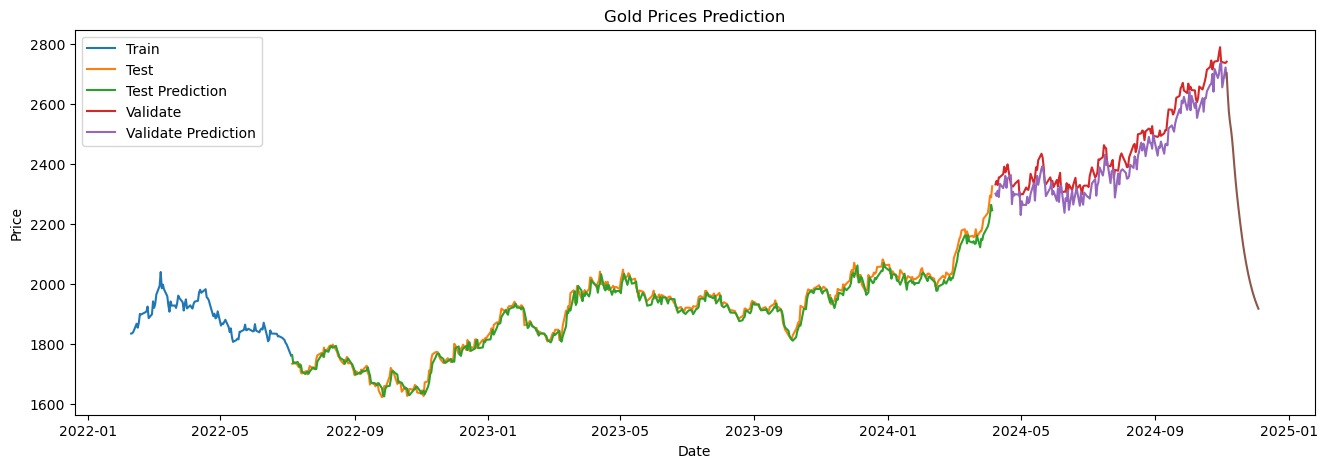

In [29]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [30]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  15.528568878241922
MAPE:  0.8055623873230668
RMSE:  20.370677677569123

** Validate **
MAE:  45.71848936106419
MAPE:  1.849420723826256
RMSE:  51.520495874532465


# Split dataset (5-3-2)

---



In [31]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [32]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [33]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [34]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.11255, saving model to save_model_5_3_2.keras
13/13 - 4s - 301ms/step - loss: 0.1126
Epoch 2/80

Epoch 2: loss improved from 0.11255 to 0.03912, saving model to save_model_5_3_2.keras
13/13 - 1s - 53ms/step - loss: 0.0391
Epoch 3/80

Epoch 3: loss improved from 0.03912 to 0.02842, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0284
Epoch 4/80

Epoch 4: loss improved from 0.02842 to 0.02797, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0280
Epoch 5/80

Epoch 5: loss improved from 0.02797 to 0.02391, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0239
Epoch 6/80

Epoch 6: loss did not improve from 0.02391
13/13 - 1s - 50ms/step - loss: 0.0243
Epoch 7/80

Epoch 7: loss improved from 0.02391 to 0.02332, saving model to save_model_5_3_2.keras
13/13 - 1s - 55ms/step - loss: 0.0233
Epoch 8/80

Epoch 8: loss improved from 0.02332 to 0.02241, saving model to save_model_5_3_2.keras


In [35]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [36]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [37]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [38]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6991178826071462, 0.6866112997919653, 0.6984596414063471, 0.7138625822664999, 0.6892442645951613, 0.6981964094336652, 0.6893760418505963, 0.6779225481952376, 0.6945760828292709, 0.6966824224180088, 0.6966166950593853, 0.6935887210280722, 0.7178120294712937, 0.7367035196804059, 0.7147840554399809, 0.7180095340853523, 0.7259741558535635, 0.7541469115015789, 0.7534886703007799, 0.7593469524802534, 0.7853474799118132, 0.7803449435471974, 0.7783702199448004, 0.7413112080859987, 0.7390073638832022, 0.7473012675209072, 0.7530279337140395, 0.7126118272235253, 0.7311084694736145, 0.729331250485276, 0.747564499493589, 0.7617166853107673, 0.7673117355175587, 0.7611900600963093, 0.7453922712771337, 0.7370985289085228, 0.7380200020820038, 0.7588862158935128, 0.7654029005428793, 0.7853474799118132, 0.7881779493290677, 0.7702079322934365, 0.7792259657596579, 0.8091759403960117, 0.8112822799847497, 0.81753557139234, 0.8156265751485665, 0.7962084597249965, 0.8156265751485665, 0.821748250569

In [39]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8933224081993103], [0.8450790047645569], [0.7967867255210876], [0.761375904083252], [0.7357969284057617], [0.7153249979019165], [0.6970088481903076], [0.6798105239868164], [0.6638334393501282], [0.649519145488739], [0.6371597647666931], [0.6267489790916443], [0.6180378198623657], [0.6106606125831604], [0.6042476296424866], [0.5984885096549988], [0.5931524634361267], [0.5880787372589111], [0.5831577181816101], [0.578313410282135], [0.5734910368919373], [0.5686506628990173], [0.5637666583061218], [0.5588269233703613], [0.5538320541381836], [0.5487942099571228], [0.543734073638916], [0.5386776924133301], [0.5336534976959229], [0.5286898016929626]]


In [40]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2626.43540776]
 [2553.14403163]
 [2479.77840337]
 [2425.98228518]
 [2387.12270658]
 [2356.02175076]
 [2328.19585702]
 [2302.06816373]
 [2277.79577753]
 [2256.049503  ]
 [2237.27313241]
 [2221.45706733]
 [2208.22307465]
 [2197.01562171]
 [2187.27301834]
 [2178.52376354]
 [2170.41724239]
 [2162.70923783]
 [2155.23322589]
 [2147.87375356]
 [2140.54760415]
 [2133.19410821]
 [2125.77432867]
 [2118.2698836 ]
 [2110.68167851]
 [2103.02818588]
 [2095.34082703]
 [2087.65917292]
 [2080.02641655]
 [2072.48556983]]


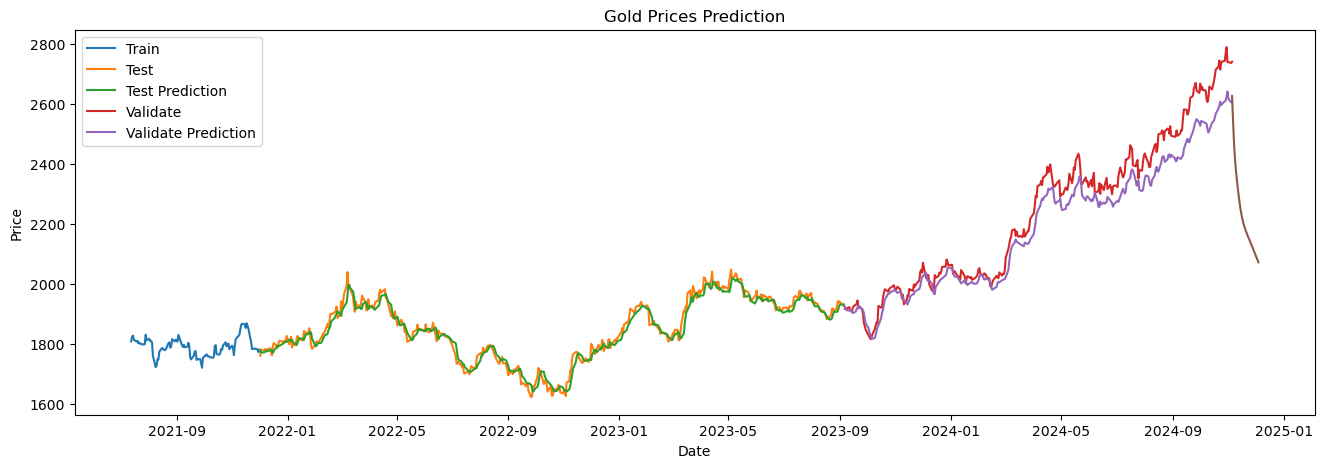

In [41]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [42]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  15.58143448317035
MAPE:  0.8423978407077368
RMSE:  20.238501791849917

** Validate **
MAE:  52.23629085826271
MAPE:  2.1907953437317134
RMSE:  65.4272959289841
